# Handwritten Digits Recognition using CNN



In [15]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import datetime
import math
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
from keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.math import confusion_matrix
from tensorflow.keras.metrics import categorical_crossentropy

In [3]:
batch_size = 128
num_classes = 10
epochs = 5
img_rows, img_cols = 28, 28

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(28, 28, 1)
    )
)

model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2,2)
    )
)

model.add(
    Dropout(0.25)
)

model.add(
    Flatten()
)

model.add(
    Dense(
        units=128,
        activation='relu'
    )
)

model.add(
    Dropout(0.50)
)

model.add(
    Dense(
        units=num_classes,
        activation='softmax'
    )
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

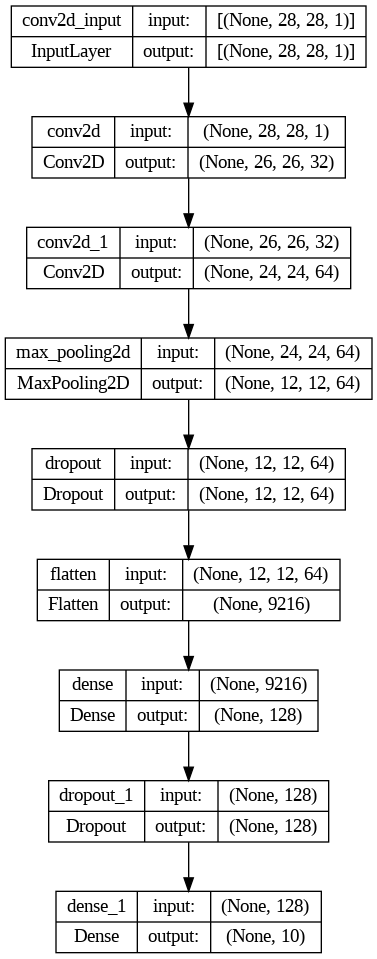

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True)


In [9]:
model.compile(
    optimizer='adam',
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

In [10]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/5
469/469 [==============================] - 187s 396ms/step - loss: 0.7971 - accuracy: 0.8797 - val_loss: 0.0647 - val_accuracy: 0.9784
Epoch 2/5
469/469 [==============================] - 160s 342ms/step - loss: 0.1446 - accuracy: 0.9587 - val_loss: 0.0485 - val_accuracy: 0.9841
Epoch 3/5
469/469 [==============================] - 168s 358ms/step - loss: 0.1100 - accuracy: 0.9671 - val_loss: 0.0502 - val_accuracy: 0.9851
Epoch 4/5
469/469 [==============================] - 159s 338ms/step - loss: 0.0941 - accuracy: 0.9728 - val_loss: 0.0422 - val_accuracy: 0.9871
Epoch 5/5
469/469 [==============================] - 163s 347ms/step - loss: 0.0809 - accuracy: 0.9760 - val_loss: 0.0414 - val_accuracy: 0.9881


In [11]:
validation_loss, validation_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Validation loss: {validation_loss}')
print(f'Validation accuracy: {validation_accuracy}')

Validation loss: 0.041433971375226974
Validation accuracy: 0.988099992275238


In [12]:
model_name = 'handwritten_digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
loaded_model = load_model(model_name)
predictions = loaded_model.predict([x_test])

prediction_results = np.argmax(predictions, axis=1)
print(prediction_results.shape)

313/313 [==============================] - 8s 25ms/step
(10000,)


Enter an image index: 4
1/1 [==============================] - 0s 126ms/step
Predicted result: 4


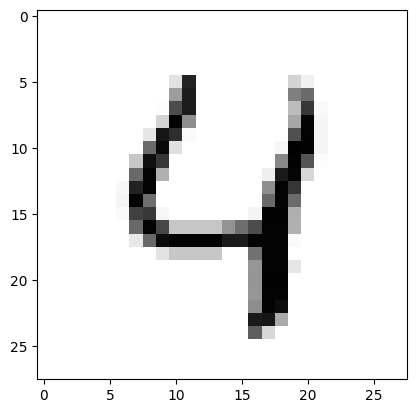

In [13]:
image_index = (int)(input("Enter an image index: "))
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')

prediction = loaded_model.predict(x_test[image_index].reshape(1, 28, 28, 1))

print(f'Predicted result: {prediction.argmax()}')

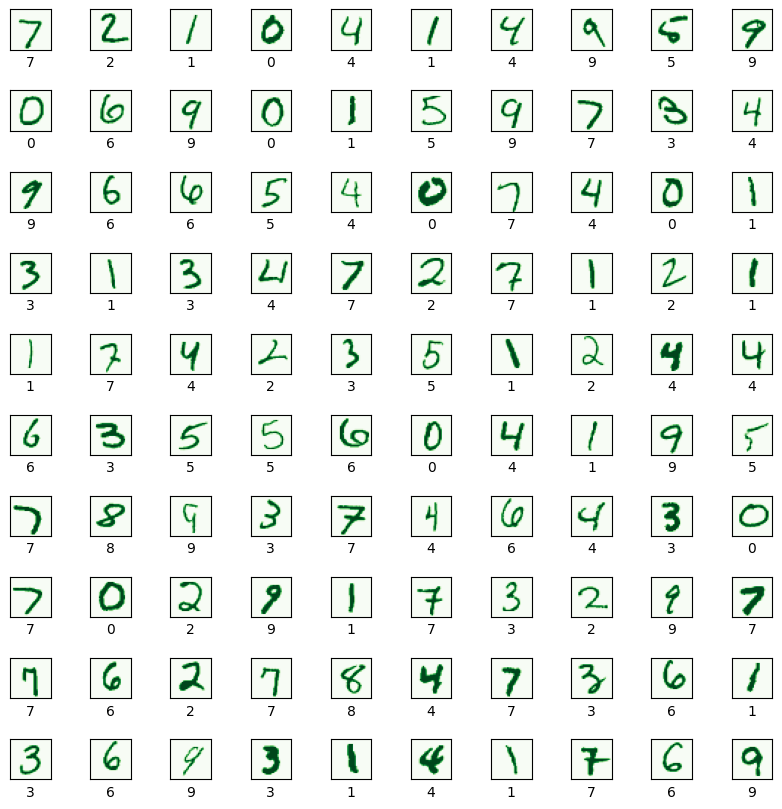

In [26]:
numbers_to_display = 100

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))

for i in range(numbers_to_display):
  plt.subplot(num_cells, num_cells, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  color_map = 'Greens' if prediction_results[i] == y_test[i].argmax() else 'Reds'
  plt.imshow(x_test[i], cmap=color_map)
  plt.xlabel(prediction_results[i])

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

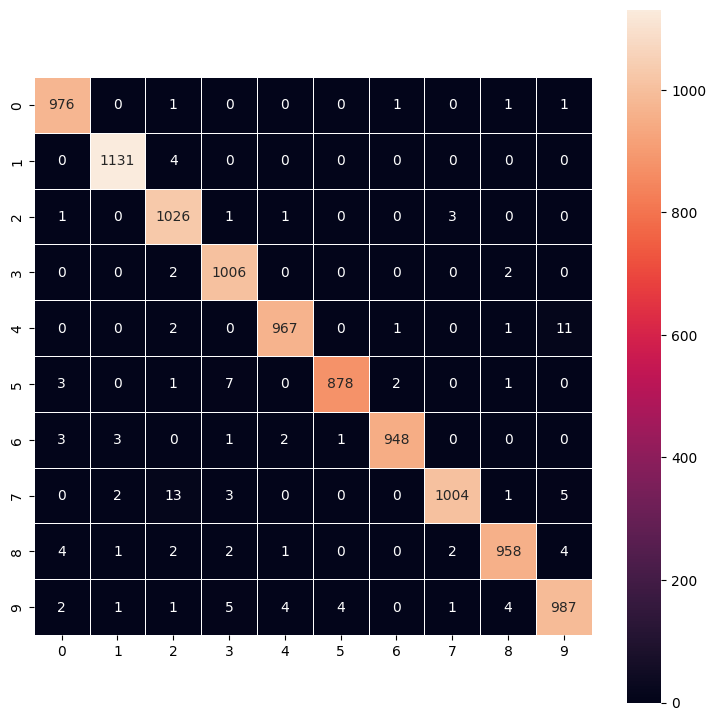

In [34]:
y_test_results = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_results, prediction_results)
f, ax = plt.subplots(figsize=(9, 9))
sn.heatmap(
    cm,
    annot=True,
    linewidths=0.5,
    fmt='d',
    square=True,
    ax=ax
)
plt.show()